In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso 
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

 

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
y=df['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [ ]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
# Creating Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor= ColumnTransformer(
    [ 
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),

    ]
)

In [12]:
X=preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [29]:
def evaluate_model (true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [31]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #for training models

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse,model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Value: {:.4f}".format(model_train_mae))
    print("Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

    


LinearRegression
Model performance for Training set
-Root Mean Squared Error: 5.3293
-Mean Absolute Value: 4.2715
Mean Squared Error: 28.4013
-R2 Score: 0.8740
Model performance for Test set
- Root Mean Squared Error: 5.4252
- Mean Absolute Error: 4.2222
Mean Squared Error: 29.4326
- R2 Score: 0.8790


Lasso
Model performance for Training set
-Root Mean Squared Error: 6.5938
-Mean Absolute Value: 5.2063
Mean Squared Error: 43.4784
-R2 Score: 0.8071
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
Mean Squared Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Training set
-Root Mean Squared Error: 5.3233
-Mean Absolute Value: 4.2650
Mean Squared Error: 28.3378
-R2 Score: 0.8743
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
Mean Squared Error: 29.0563
- R2 Score: 0.8806


KNeighborsRegressor
Model performance for Training set
-Root Mean Squared Error: 5.7079
-Mean Absolute Value: 

In [32]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879046
5,RandomForestRegressor,0.852049
8,AdaBoostRegressor,0.851995
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.718889


In [35]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.90


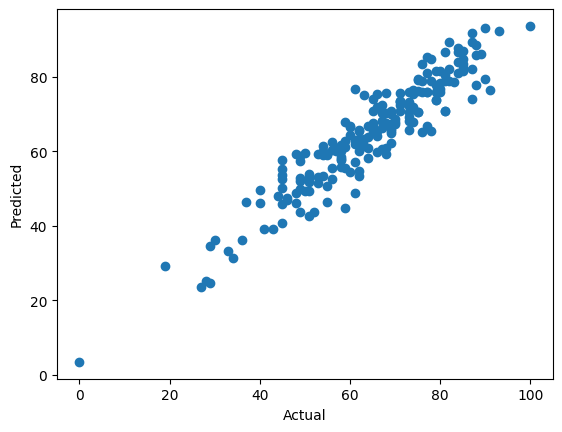

In [38]:
#Plotting y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


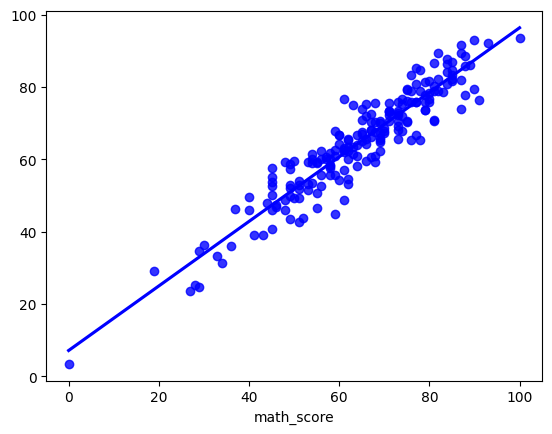

In [40]:
sns.regplot(x=y_test,y=y_pred, ci=None,color='blue');


In [41]:
#difference between actual and predicted value

In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred,'Difference':y_test-y_pred})

In [43]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
